In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

In [23]:
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2017-10-20.csv', parse_dates=True,date_parser=dateparse, index_col='timestamp')

In [24]:
data

,id,open,high,low,close,volume_btc,volume_currency,weighted_price
timestamp,,,,,,,,
2014-12-01 00:33:00,1,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 00:34:00,2,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 00:35:00,3,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 00:36:00,4,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 00:37:00,5,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 00:38:00,6,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 00:39:00,7,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 00:40:00,8,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2014-12-01 00:41:00,9,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000


In [25]:
data.plot(x='id', y='weighted_price')

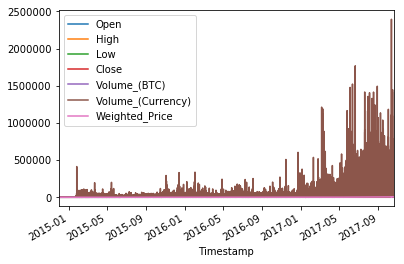

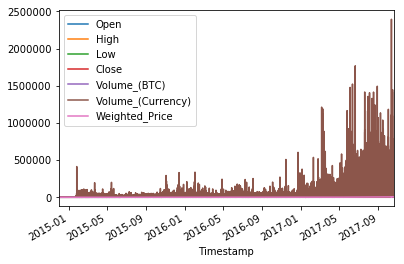

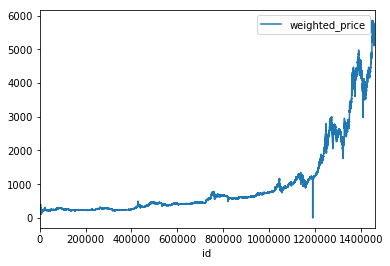

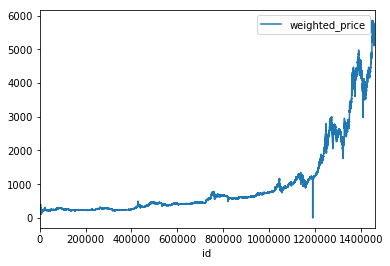

In [26]:
plt.show()

In [5]:
# abstract feature class to use for approximate Q learning
class FeatureExtractor:
    def getFeatures(self, state, action):
        """
          Returns a dict from features to counts
          Usually, the count will just be 1.0 for
          indicator functions.
        """
        util.raiseNotDefined()

In [6]:
"""
  Data structures and functions useful for various course projects

  The search project should not need anything below this line.
"""

class Counter(dict):
    """
    A counter keeps track of counts for a set of keys.

    The counter class is an extension of the standard python
    dictionary type.  It is specialized to have number values
    (integers or floats), and includes a handful of additional
    functions to ease the task of counting data.  In particular,
    all keys are defaulted to have value 0.  Using a dictionary:

    a = {}
    print a['test']

    would give an error, while the Counter class analogue:

    >>> a = Counter()
    >>> print a['test']
    0

    returns the default 0 value. Note that to reference a key
    that you know is contained in the counter,
    you can still use the dictionary syntax:

    >>> a = Counter()
    >>> a['test'] = 2
    >>> print a['test']
    2

    This is very useful for counting things without initializing their counts,
    see for example:

    >>> a['blah'] += 1
    >>> print a['blah']
    1

    The counter also includes additional functionality useful in implementing
    the classifiers for this assignment.  Two counters can be added,
    subtracted or multiplied together.  See below for details.  They can
    also be normalized and their total count and arg max can be extracted.
    """
    def __getitem__(self, idx):
        self.setdefault(idx, 0)
        return dict.__getitem__(self, idx)

    def incrementAll(self, keys, count):
        """
        Increments all elements of keys by the same count.

        >>> a = Counter()
        >>> a.incrementAll(['one','two', 'three'], 1)
        >>> a['one']
        1
        >>> a['two']
        1
        """
        for key in keys:
            self[key] += count

    def argMax(self):
        """
        Returns the key with the highest value.
        """
        if len(self.keys()) == 0: return None
        all = self.items()
        values = [x[1] for x in all]
        maxIndex = values.index(max(values))
        return all[maxIndex][0]

    def sortedKeys(self):
        """
        Returns a list of keys sorted by their values.  Keys
        with the highest values will appear first.

        >>> a = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> a['third'] = 1
        >>> a.sortedKeys()
        ['second', 'third', 'first']
        """
        sortedItems = self.items()
        compare = lambda x, y:  sign(y[1] - x[1])
        sortedItems.sort(cmp=compare)
        return [x[0] for x in sortedItems]

    def totalCount(self):
        """
        Returns the sum of counts for all keys.
        """
        return sum(self.values())

    def normalize(self):
        """
        Edits the counter such that the total count of all
        keys sums to 1.  The ratio of counts for all keys
        will remain the same. Note that normalizing an empty
        Counter will result in an error.
        """
        total = float(self.totalCount())
        if total == 0: return
        for key in self.keys():
            self[key] = self[key] / total

    def divideAll(self, divisor):
        """
        Divides all counts by divisor
        """
        divisor = float(divisor)
        for key in self:
            self[key] /= divisor

    def copy(self):
        """
        Returns a copy of the counter
        """
        return Counter(dict.copy(self))

    def __mul__(self, y ):
        """
        Multiplying two counters gives the dot product of their vectors where
        each unique label is a vector element.

        >>> a = Counter()
        >>> b = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> b['first'] = 3
        >>> b['second'] = 5
        >>> a['third'] = 1.5
        >>> a['fourth'] = 2.5
        >>> a * b
        14
        """
        sum = 0
        x = self
        if len(x) > len(y):
            x,y = y,x
        for key in x:
            if key not in y:
                continue
            sum += x[key] * y[key]
        return sum

    def __radd__(self, y):
        """
        Adding another counter to a counter increments the current counter
        by the values stored in the second counter.

        >>> a = Counter()
        >>> b = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> b['first'] = 3
        >>> b['third'] = 1
        >>> a += b
        >>> a['first']
        1
        """
        for key, value in y.items():
            self[key] += value

    def __add__( self, y ):
        """
        Adding two counters gives a counter with the union of all keys and
        counts of the second added to counts of the first.

        >>> a = Counter()
        >>> b = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> b['first'] = 3
        >>> b['third'] = 1
        >>> (a + b)['first']
        1
        """
        addend = Counter()
        for key in self:
            if key in y:
                addend[key] = self[key] + y[key]
            else:
                addend[key] = self[key]
        for key in y:
            if key in self:
                continue
            addend[key] = y[key]
        return addend

    def __sub__( self, y ):
        """
        Subtracting a counter from another gives a counter with the union of all keys and
        counts of the second subtracted from counts of the first.

        >>> a = Counter()
        >>> b = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> b['first'] = 3
        >>> b['third'] = 1
        >>> (a - b)['first']
        -5
        """
        addend = Counter()
        for key in self:
            if key in y:
                addend[key] = self[key] - y[key]
            else:
                addend[key] = self[key]
        for key in y:
            if key in self:
                continue
            addend[key] = -1 * y[key]
        return addend

In [7]:
class ApproximateQLearningAgent():
    def __init__(self, alpha, ):
        self.epsilon = float(epsilon)
        self.alpha = float(alpha)
        self.discount = float(gamma)
        self.weights = Counter()
        